In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy as sp
from scipy import stats
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import FuncFormatter, StrMethodFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy = (.1, .9), xycoords = ax.transAxes)
    
import warnings
warnings.filterwarnings("ignore")

# Exploring Data

### Mobile Phone issued offences
Mobile phone penalty notices issued by the NSW Police Force.

Revenuse NSW 2020, Data and Statistics, viewed 20/10/2020 <https://www.revenue.nsw.gov.au/help-centre/resources-library/statistics>

In [2]:
mpo = pd.read_csv('data/mobile_phone_offences test.csv')
# mpo[' OFFENCE_MONTH '] = pd.to_datetime(mpo[' OFFENCE_MONTH ']) (messes up date if included)
mpo.head()

,OFFENCE_MONTH,MP_POLICE_ISSUE_NUMBER,MP_POLICE_ISSUE_VALUE,MP_CAMERA_ISSUE_NUMBER,MP_CAMERA_ISSUE_VALUE,MP_TOTAL_NUMBER,MP_TOTAL_Value
0,1/09/2020,638,224847,9035.0,5244423.0,9673,5469270
1,1/08/2020,688,241607,13578.0,6352498.0,14266,6594105
2,1/07/2020,766,269174,13861.0,5852381.0,14627,6121555
3,1/06/2020,1381,477211,12643.0,5137640.0,14024,5614851
4,1/05/2020,1247,430663,14060.0,5501248.0,15307,5931911


Text(0.5, 1.0, 'Graph 1: total number of mobile phone offences from septempber 2018 - september 2020 caught')

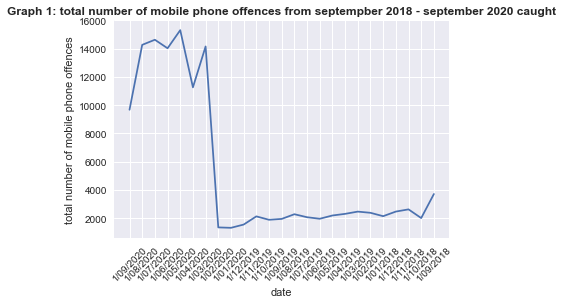

In [3]:
# create line plot to see the overall trends in mobile phone offences
fig = sns.lineplot(x= mpo[' OFFENCE_MONTH '],y= mpo['MP_TOTAL_NUMBER'],sort=False)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('total number of mobile phone offences')
plt.title('Graph 1: total number of mobile phone offences from septempber 2018 - september 2020 caught', fontweight = 'bold')

Text(0.5, 1.0, 'Graph 2: mobile phone offences from septempber 2018 - september 2020')

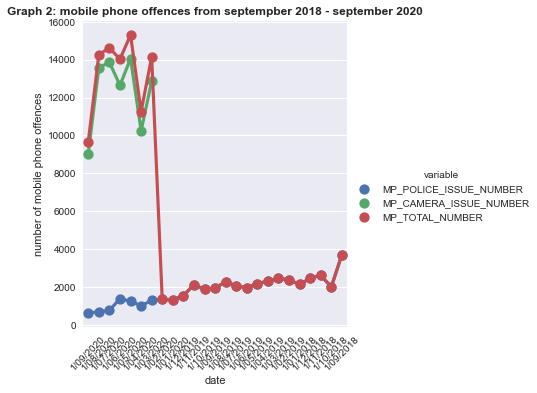

In [4]:
# create point graph to see the proportion of police issued VS camera issued Mobile Phone Offences
mpoG = mpo.drop(['MP_POLICE_ISSUE_VALUE','MP_TOTAL_Value','MP_CAMERA_ISSUE_VALUE'],axis=1)
mpoG = mpoG.melt(' OFFENCE_MONTH ')
mpoG
sns.catplot(x=' OFFENCE_MONTH ', y='value', hue='variable', data=mpoG, kind='point')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('number of mobile phone offences')
plt.title('Graph 2: mobile phone offences from septempber 2018 - september 2020', fontweight = 'bold')

Text(0.5, 1.0, 'graph 3: source of offences issued')

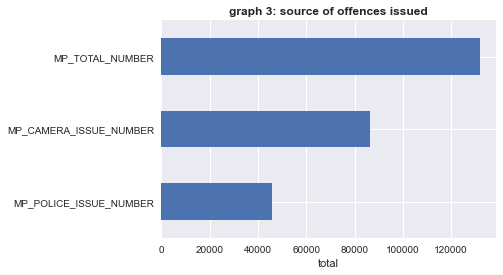

In [5]:
# create bar chat to see sources of the mobile phone issues
mpoTot = mpo.drop([' OFFENCE_MONTH ','MP_POLICE_ISSUE_VALUE','MP_TOTAL_Value','MP_CAMERA_ISSUE_VALUE'],axis=1)
mpoTot = mpoTot.sum(axis=0)
mpoTot.plot(kind='barh')
plt.xlabel('total')
plt.title('graph 3: source of offences issued', fontweight = 'bold')

##### Analysis - mobile phone offences 
contains all the mobile phone offences issued between september 2018 - september 2020.
variables 
* OFFENCE_MONTH: contains what month the data is in (labled by the first of the month)
* MP_POLICE_ISSUE_NUMBER: states the months total police issued mobile phone penalty notices
* MP_CAMERA_ISSUE_NUMBER: states the months total camera issue mobile phone penalty notices
* MP_TOTAL_NUMBER: states the combined month total of camera issue mobile phone penalty notices

When looking at the data, graph 1 shows the overall trend in penalty notices issued, specifically a drastic increase after march 2020 is apparent, where to total number of mobile phone offences jumps from under 1,500 to 14,000 in one month then stays above 10,000 till september 2020. This increase can be explained by graph 2 where we can see that cameras were introduced in april 2020. further more the cameras have been so efficient in the 6 months they have been implemented they have issued almost double the amount of penalty notices as shown in graph 3.

***

### Seat Belt Offences
Data set includes penalty notices issued for all seat belt and unrestrained passenger offences

Revenuse NSW 2020, Data and Statistics, viewed 20/10/2020 <https://www.revenue.nsw.gov.au/help-centre/resources-library/statistics>

In [6]:
sbo = pd.read_csv('data/Seat_belt_offences_test.csv')
# sbo[' OFFENCE_MONTH '] = pd.to_datetime(sbo[' OFFENCE_MONTH ']) interfears with values
sbo.head()

,OFFENCE_MONTH,SB_NUMBER,SB_VALUE
0,1/09/2020,665,234567
1,1/08/2020,669,237860
2,1/07/2020,636,224192
3,1/06/2020,1052,369491
4,1/05/2020,916,320095


Text(0.5, 1.0, 'Graph 4: total number of seat belt offences from septempber 2018 - september 2020')

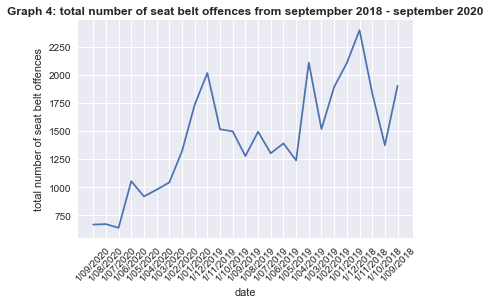

In [7]:
# create line plot to see the overall trends in seat belt offences
fig = sns.lineplot(x= sbo[' OFFENCE_MONTH '],y= sbo['SB_NUMBER'],sort=False)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('total number of seat belt offences')
plt.title('Graph 4: total number of seat belt offences from septempber 2018 - september 2020', fontweight = 'bold')

##### Analysis - Seat belt offences 
contains all the seat belt offences issued between september 2018 - september 2020.
variables 
* OFFENCE_MONTH: contains what month the data is in (labled by the first of the month)
* SB_NUMBER: states the months of seat belt offenses issued

When looking at the data, graph 4 shows the overall trend in seat belt penalty notices issued, there is a clear decrease over 2020 after an increase of 500 at the end of 2019, with the number of fines issued in the last 3 months of the data falling below 700.

***

### Camera Offences
Data set includes all penalty notices detected by RMS Static Speed Cameras, RMS Red Light Cameras, RMS Mobile Speed Cameras and RMS Combined Red Light/Speed Cameras.

Revenuse NSW 2020, Data and Statistics, viewed 20/10/2020 <https://www.revenue.nsw.gov.au/help-centre/resources-library/statistics>

In [8]:
cao = pd.read_csv('data/Camera-Offenses_test.csv')
# cao[' OFFENCE_MONTH '] = pd.to_datetime(cao[' OFFENCE_MONTH ']) interfears with the graphs
cao.head()

,OFFENCE_MONTH,SC_NUMBER,SC_VALUE,RLC_NUMBER,RLC_VALUE,Total NUMBER,Total VALUE
0,1/09/2020,62891,17267015,10072,6815360,72963,24082375
1,1/08/2020,64803,14684265,12288,6626484,77091,21310749
2,1/07/2020,50093,11199510,11990,5985087,62083,17184597
3,1/06/2020,33917,7911760,10612,5124392,44529,13036152
4,1/05/2020,42074,10296882,10045,4845510,52119,15142392


Text(0.5, 1.0, 'Graph 5: total number of camera caught offences from septempber 2018 - september 2020')

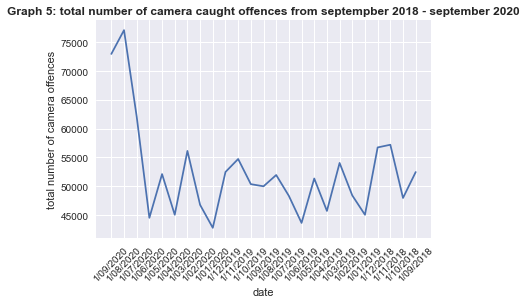

In [9]:
# create line plot to see the overall trends in Camera offences
fig = sns.lineplot(x= cao[' OFFENCE_MONTH '],y= cao['Total NUMBER'],sort=False)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('total number of camera offences')
plt.title('Graph 5: total number of camera caught offences from septempber 2018 - september 2020', fontweight = 'bold')

Text(0.5, 1.0, 'Graph 6: camera caught offences from septempber 2018 - september 2020')

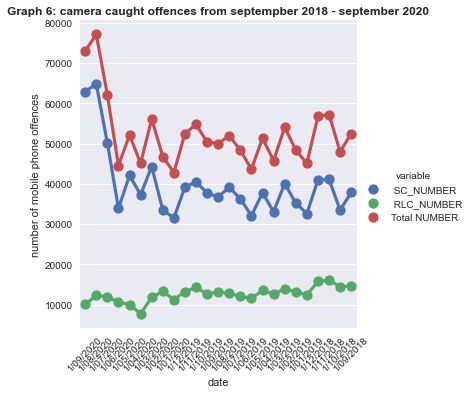

In [10]:
# create point graph to see the proportion of camera caught Offences
caoG = cao.drop([' SC_VALUE ',' RLC_VALUE ','Total VALUE'],axis=1)
caoG = caoG.melt(' OFFENCE_MONTH ')
sns.catplot(x=' OFFENCE_MONTH ', y='value', hue='variable', data=caoG, kind='point')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('number of mobile phone offences')
plt.title('Graph 6: camera caught offences from septempber 2018 - september 2020', fontweight = 'bold')

Text(0.5, 1.0, 'Graph 7: source of camera issued offences')

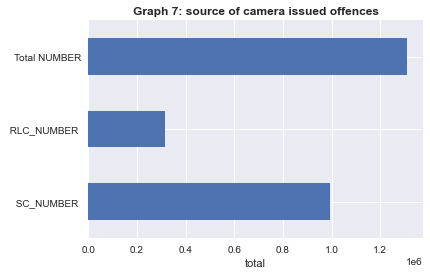

In [11]:
# create bar chat to see sources of the offences issued 
caoTot = cao.drop([' OFFENCE_MONTH ',' SC_VALUE ',' RLC_VALUE ','Total VALUE'],axis=1)
caoTot = caoTot.sum(axis=0)
caoTot.plot(kind='barh')
plt.xlabel('total')
plt.title('Graph 7: source of camera issued offences', fontweight = 'bold')

##### Analysis - Camera issued offences 
contains all the camera offences issued between september 2018 - september 2020.
variables 
* OFFENCE_MONTH: contains what month the data is in (labled by the first of the month)
* SC_VALUE: states the months total speeding camera issued penalty notices
* RLC_VALUE: states the months total red light issue penalty notices
* Total VALUE: states the combined month total of camera issued penalty notices

When looking at the data, graph 5 shows the overall trend in penalty notices issued, specifically a drastic increase after june 2020 is apparent, where to total number of mobile phone offences jumps from under 45,000 to 75,000 in a few months.  This increase can be explained by graph 6 where we can see that speed cameras has a spike around the same time,while Red light cameras have platyed for the past 2 years, thus not contibuting to the differences in total. furthermore the speed cameras have issued significantly more penalty notices when compared to red light cameras as shown in graph 7.

***

### Police issued speeding Offences
Data set contains all speeding penalty notices issued by NSW Police.

Revenuse NSW 2020, Data and Statistics, viewed 20/10/2020 <https://www.revenue.nsw.gov.au/help-centre/resources-library/statistics>

In [12]:
pio = pd.read_csv('data/Police-Issued-Speeding-Offenses test.csv')
pio.head()

,OFFENCE_MONTH,PIS_NUMBER,PIS_VALUE
0,1/09/2020,12534,4344852
1,1/08/2020,14180,5151907
2,1/07/2020,13702,4938314
3,1/06/2020,23681,8086564
4,1/05/2020,25437,9043873


Text(0.5, 1.0, 'Graph 8: total number of police issued speeding offences from septempber 2018 - september 2020 caught')

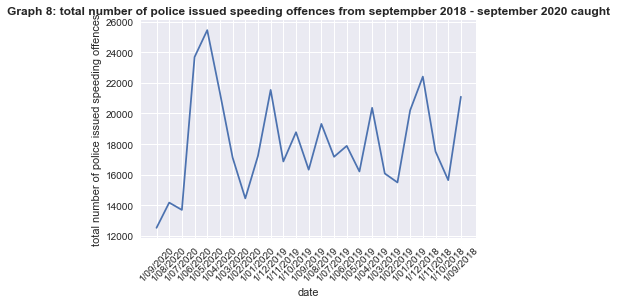

In [13]:
# create line plot to see the overall trends in police issued speeding offences
fig = sns.lineplot(x= pio[' OFFENCE_MONTH '],y= pio[' PIS_NUMBER '],sort=False)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('total number of police issued speeding offences')
plt.title('Graph 8: total number of police issued speeding offences from septempber 2018 - september 2020 caught', fontweight = 'bold')

##### Analysis - police issued offences 
contains all the mobile phone offences issued between september 2018 - september 2020.
variables 
* OFFENCE_MONTH: contains what month the data is in (labled by the first of the month)
* PIS_NUMBER: states the months total police issued penalty notices

When looking at the data, graph 5 shows the overall trend in police issued speeding offences. 2020 has seen significant variation with the speeding offences, with a sharp decline at the begining of 2020, then a high spike starting in march, peaking in june at 25,000 (the most issued in the two year period by over 1000) then declining significantly between july & august and beyond to september.

***

### Covid
Data set contains all new covid cases in NSW in 2020 grouped by month.

DATA NSW 2020, NSW COVID-19 cases data, viewed 20/10/2020 <https://data.nsw.gov.au/nsw-covid-19-data/cases>

In [14]:
covid = pd.read_csv('data/Covid-Dataset grouped.csv')
covid.head()

,Row Labels,Count of cases
0,1/01/2020,4
1,1/02/2020,0
2,1/03/2020,2147
3,1/04/2020,868
4,1/05/2020,66


Text(0.5, 1.0, 'Graph 9: total number of new covid cases per month for 2020')

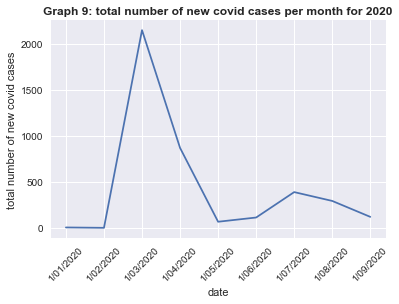

In [15]:
fig = sns.lineplot(x= covid['Row Labels'],y= covid['Count of cases'],sort=False)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('total number of new covid cases')
plt.title('Graph 9: total number of new covid cases per month for 2020', fontweight = 'bold')

##### Analysis - covid data
contains all new covid cases by month
variables 
* Row Labels: contains what month the data is in (labled by the first of the month)
* Count of cases: states the months total of new covid cases

When looking at the data, graph 9 shows the overall trend covid cases for 2020. it is clear at the start of the year there was a large spike in the number of cases in march where 2000 cases of covid were reported. none of the other months come close to 2000 with april and july being the next largest spikes at 800 and 300 respecitivly.

***

### Transport
Data set contains the Opal trips by public transport mode by month

Open Data 2020, Opal Monthly Trips, viewed 20/10/2020 <https://opendata.transport.nsw.gov.au/dataset/opal-trips-all-modes/resource/84b62f0a-1a20-40b7-b8d7-ac4faf94def8?fbclid=IwAR1cPx_adER7npwFB6YRFxh8joA0-yls3TFb9P4qs5LyYikzoh6GC-94FXE#{}>

In [16]:
tspt = pd.read_csv('data/transport.csv')
tspt.head()

,date,Bus,Ferry,Lightrail,Metro,Train,Grand Total
0,1/01/2017,19550895,1738083,428998,NaN,26735422,48453398
1,1/02/2017,22534683,1186315,740308,NaN,28767036,53228342
2,1/03/2017,26811115,1216242,875062,NaN,34566385,63468804
3,1/04/2017,20723045,1408468,815237,NaN,28745729,51692479
4,1/05/2017,26075384,1149830,833483,NaN,34863010,62921707


Text(0.5, 1.0, 'Graph 10: total number of opal trips per month for 2018-2020')

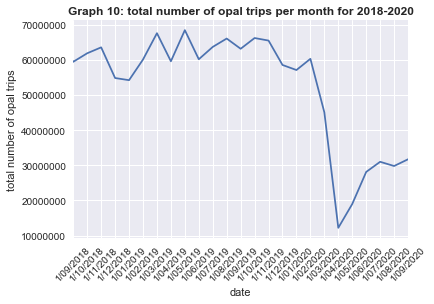

In [17]:
# create graph showing the monthly total of the opal trips
v = ['date', 'Grand Total']
vtran =tspt[v]
fig = sns.lineplot(x= vtran['date'],y= vtran['Grand Total'],sort=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xlim('1/09/2018','1/09/2020')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('total number of opal trips')
plt.title('Graph 10: total number of opal trips per month for 2018-2020', fontweight = 'bold')

Text(0.5, 1.0, 'Graph 11: number of total trips broken down by public transport type')

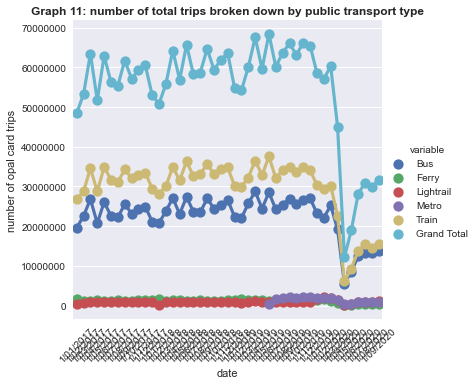

In [18]:
# create point graph to see the proportion of different travel types
tsptm = tspt.melt('date')
sns.catplot(x='date', y='value', hue='variable', data=tsptm, kind='point', sort=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('number of opal card trips')
plt.title('Graph 11: number of total trips broken down by public transport type', fontweight = 'bold')

Text(0.5, 1.0, 'Graph 12: exploration into trends within ferry, lightrain and metro')

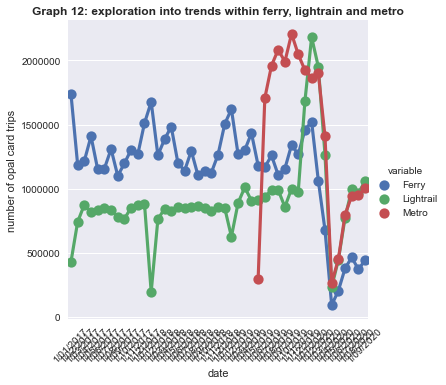

In [19]:
# greate graph that shows the trends in ferry, lightrain and metro.
tspts = tspt.drop(['Bus','Train','Grand Total'],axis=1)
tspts = tspts.melt('date')
sns.catplot(x='date', y='value', hue='variable', data=tspts, kind='point', sort=False)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('number of opal card trips')
plt.title('Graph 12: exploration into trends within ferry, lightrain and metro', fontweight = 'bold')

Text(0.5, 1.0, 'Graph 13: total public transport trips')

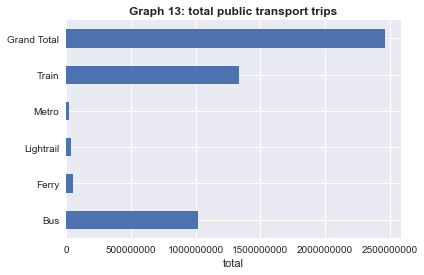

In [20]:
# create graph showing the proportion each of the transport types that make up total tripes made
tsptAT = tspt.drop(['date'],axis=1)
tsptAT = tsptAT.sum(axis=0)
tsptAT
tsptAT.plot(kind='barh')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('total')
plt.title('Graph 13: total public transport trips', fontweight = 'bold')

##### Analysis - Transport 
contains all opal card trips made between 2017- september 2020
variables 
* date: contains what month the data is in (labled by the first of the month)
* Bus: states the months total of trips made on a bus
* Ferry: states the months total of trips made on a ferry
* Lightrail: states the months total of trips made on a lightrail
* Metro	: state the months total of trips made on a train
* Train: states the months total of trips made on a train
* Grand Total: state the months total of tips made on all transport types


When looking at the data, graph 10 shows the overall trend of public transport usage for september 2018- september 2020. it clearly shows a significant decline in amount of trips taken march of 2020 whitch a gradual increase there after, however it still hasnt gone any where near the normal as before 2020 the average amount of opal trips per month was usually above 60000000. this grand total can be broken down by public transport type to see what impact the 5 types of public transport had on this grand total. graph 11 shows the trends in the 5 transport types, it is clear that no one type contributed to the sharp decline as the usage of all the transport types is consistent around all of the types, when one goes up it usually means all have gone up a similar amount. trains and busses are clearly more utilised as they make up a significant proportion of the grand total. graph 12 shows the ferry, light rail and metro usage as there were so miniscual comparede to the other types the variations between the months was unclear. the ferry was consistently the most used but around the mid to end of 2019 the metro and light rain had significant peaks hitting above 2000000 at points then drastically declining in march 2020 mirroring what was evident in graph 11. graph 12 shows the proportion each transport type contributed to the overall grand total, it echos previous findings, showing train and bus contributing significantly with lightrail, ferry and metro contributing significantly less, however it is worth noting that the metro was introduced during mid 2019 and thus will likely increase its contribution significantly over the next few years.


***
## Correlation between variables in each data set
### Mobile phone offences data

Text(0.5, 1.0, 'Graph 14: correlation between the variables for Mobile Phone offences')

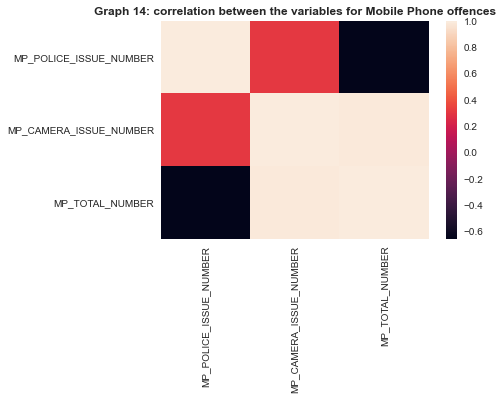

In [21]:
mpo = mpo.drop(['MP_POLICE_ISSUE_VALUE','MP_TOTAL_Value','MP_CAMERA_ISSUE_VALUE'],axis=1)
cor = mpo.corr()
sns.heatmap(cor)
plt.title('Graph 14: correlation between the variables for Mobile Phone offences', fontweight = 'bold')

##### Analysis
The number of camera issued mobile phone offences correlated very positively with the total number issued with a score around 1, while the police issued mobile phone offences had a negitive relationship with the total issued as shown in graph 14.
***
### Camera offences

Text(0.5, 1.0, 'Graph 15: correlation between the variables for camera offences')

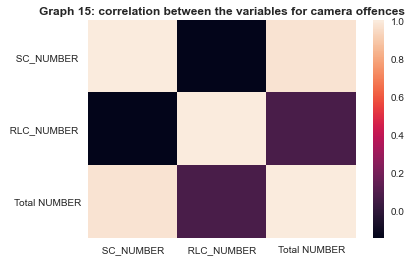

In [22]:
cao = cao.drop([' SC_VALUE ',' RLC_VALUE ','Total VALUE'],axis=1)
cor = cao.corr()
sns.heatmap(cor)
plt.title('Graph 15: correlation between the variables for camera offences', fontweight = 'bold')

##### Analysis
Speed camera issued offences correlated very strongly with total number as they had a score of close to 1, while read light camera issued offences had almost no correlation between the other variables as shown in graph 15.
***
### transport 

Text(0.5, 1.0, 'Graph 16: correlation between the variables for transport')

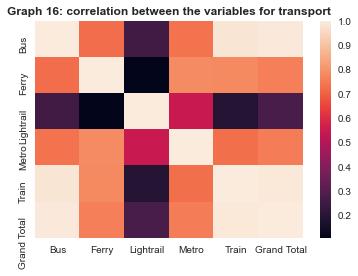

In [23]:
cor = tspt.corr()
sns.heatmap(cor)
plt.title('Graph 16: correlation between the variables for transport', fontweight = 'bold')

##### Analysis
Significant correlation between train,bus and the grand total is evident as shown in graph 14.this graph also shows little to no relationship is found with light rail and small correlation between farry and metro with the other variables sitting around 0.7.
***
#### correlation of grouped data

In [24]:
# Joining all offence,transport & covid datasets
offence_data = mpo.join(sbo, rsuffix= 'sbo', how = 'inner')
offence_data = offence_data.join(cao, rsuffix= 'cao', how = 'inner')
offence_data = offence_data.join(pio, rsuffix= 'pio', how = 'inner')
# function to flip the dataframe - https://stackoverflow.com/questions/20444087/right-way-to-reverse-pandas-dataframe 
def reset_my_index(df):
  res = df[::-1].reset_index(drop=True)
  return(res)
offence_data_withCovid = offence_data.join(reset_my_index(covid))
data= offence_data_withCovid.join(reset_my_index(tspt),rsuffix= 'tspt',how = 'left')
# Dropping all the unecessary tables
data = data.drop([' OFFENCE_MONTH sbo', ' OFFENCE_MONTH cao', ' OFFENCE_MONTH pio', ' PIS_VALUE ', ' OFFENCE_MONTH pio','Row Labels','date'], axis = 1)
data.head()

,OFFENCE_MONTH,MP_POLICE_ISSUE_NUMBER,MP_CAMERA_ISSUE_NUMBER,MP_TOTAL_NUMBER,SB_NUMBER,SB_VALUE,SC_NUMBER,RLC_NUMBER,Total NUMBER,PIS_NUMBER,Count of cases,Bus,Ferry,Lightrail,Metro,Train,Grand Total
0,1/09/2020,638,9035.0,9673,665,234567,62891,10072,72963,12534,119.0,13647627,441623,1058697,1003639.0,15546656,31698242
1,1/08/2020,688,13578.0,14266,669,237860,64803,12288,77091,14180,292.0,13107189,369977,965468,948902.0,14385299,29776835
2,1/07/2020,766,13861.0,14627,636,224192,50093,11990,62083,13702,388.0,13132371,463754,994370,943774.0,15446904,30981173
3,1/06/2020,1381,12643.0,14024,1052,369491,33917,10612,44529,23681,112.0,12386023,377351,772279,795627.0,13762670,28093950
4,1/05/2020,1247,14060.0,15307,916,320095,42074,10045,52119,25437,66.0,8549735,203728,443833,449327.0,9323674,18970297


Text(0.5, 1.0, 'Graph 17: correlation between the joined data')

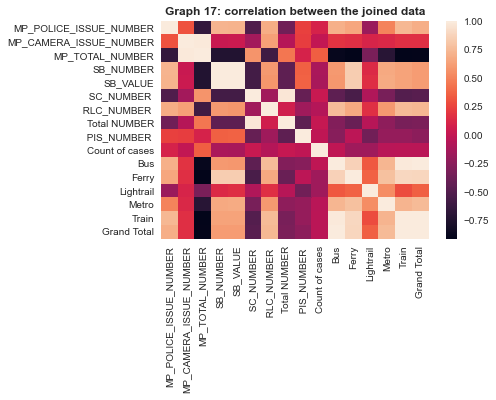

In [25]:
cor = data.corr()
sns.heatmap(cor)
plt.title('Graph 17: correlation between the joined data', fontweight = 'bold')

##### Analysis
Graph 17 shows the correlation between all the joined data sets, while count of covid cases had little to no correlation between all the other variables indicating that there could be issues with our models later on, Mobile phone offences had strong negitive relation ship with all the transport types, this however could be a result of the cameras only being used after march, when transportation took a significant drop in use. 
***

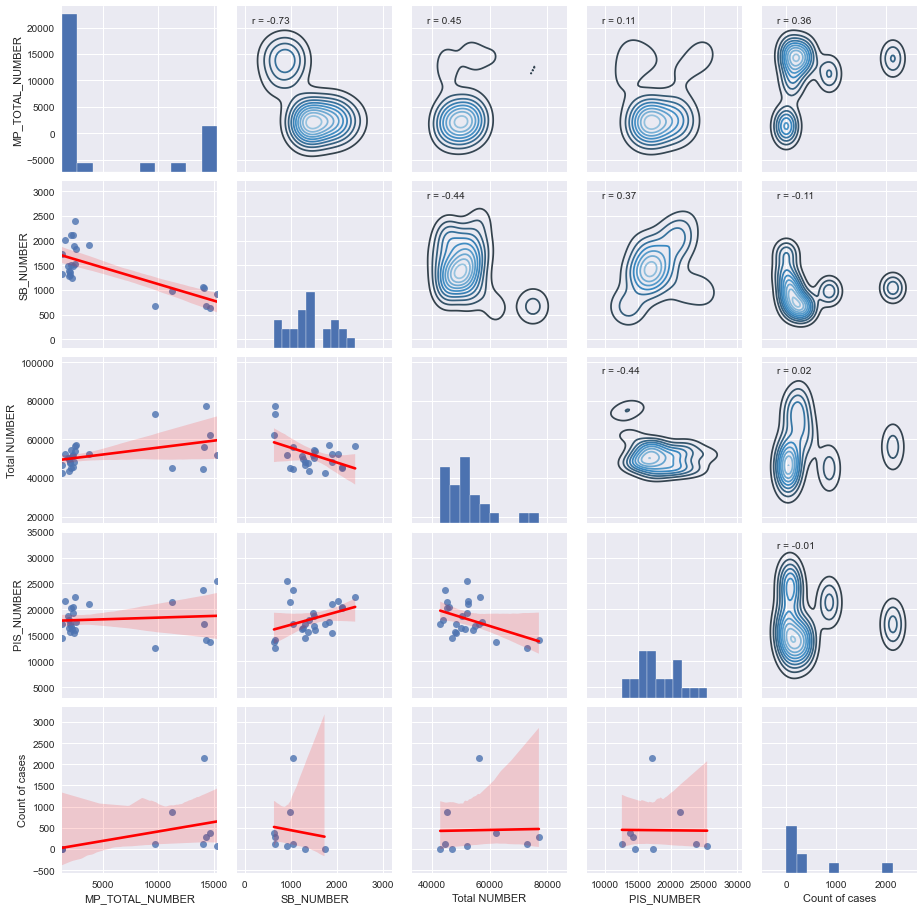

In [26]:
plots = data[[' OFFENCE_MONTH ', 'MP_TOTAL_NUMBER', 'SB_NUMBER', 'Total NUMBER', ' PIS_NUMBER ', 'Count of cases']]

g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color':'red'})
g = g.map_diag(plt.hist, edgecolor = 'w')
g = g.map_upper(corrfunc)
g.map_upper(sns.kdeplot, cmap = 'Blues_d')

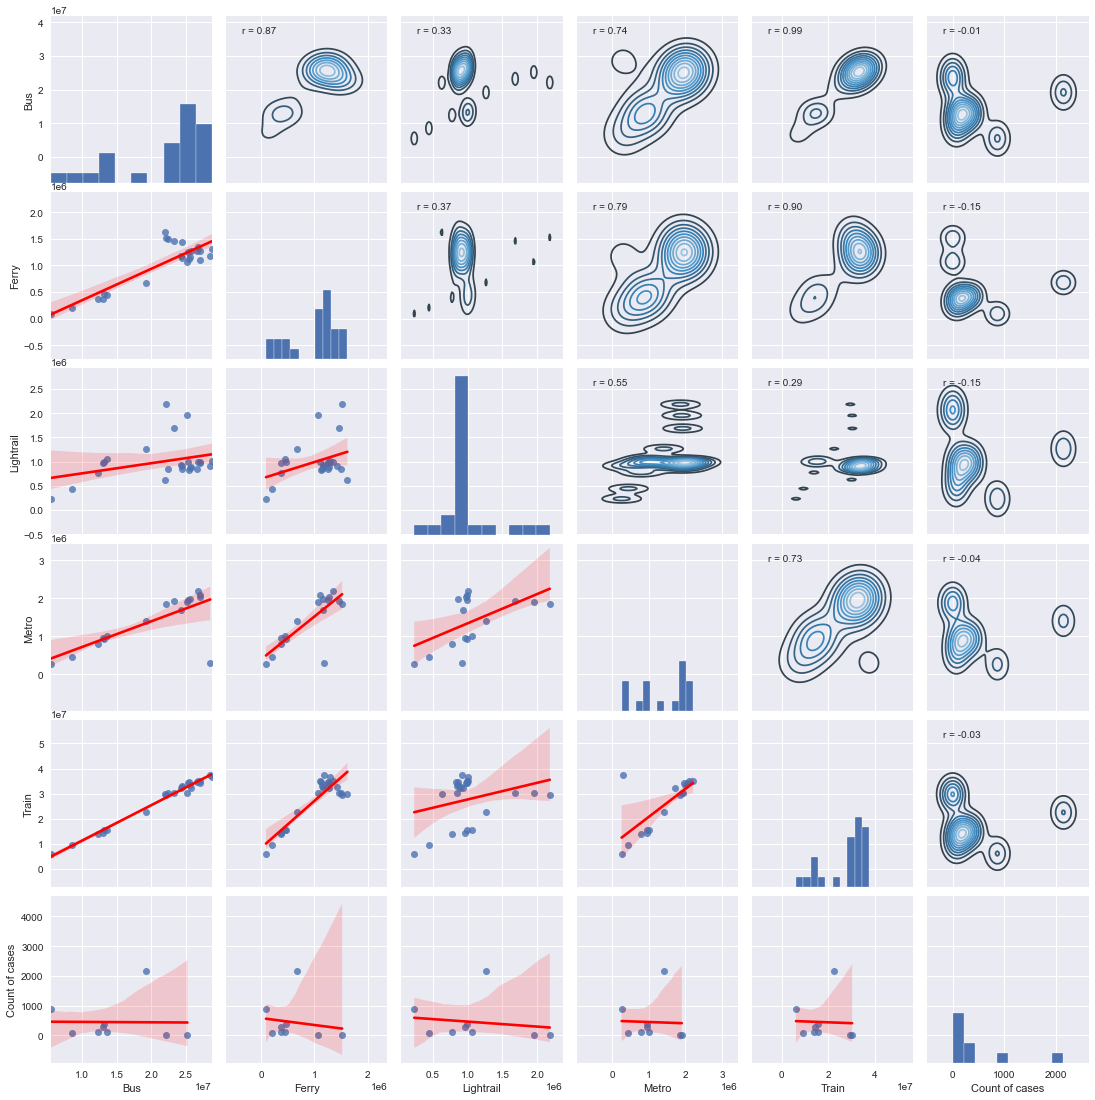

In [27]:
plots = data[['Bus', 'Ferry', 'Lightrail', 'Metro', 'Train', 'Count of cases']]

g = sns.PairGrid(plots)
g = g.map_lower(sns.regplot, line_kws={'color':'red'})
g = g.map_diag(plt.hist, edgecolor = 'w')
g = g.map_upper(corrfunc)
g.map_upper(sns.kdeplot, cmap = 'Blues_d')

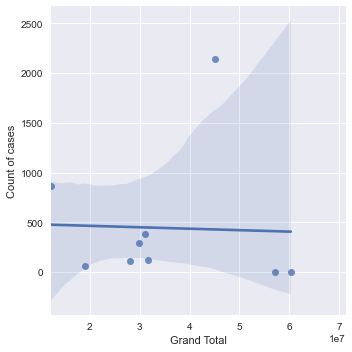

In [28]:
sns.lmplot(x='Grand Total', y='Count of cases', data=data)

### linear regression


In [29]:
covid['Row Labels'] = pd.to_datetime(covid['Row Labels']) # Converting the month's into datetime format
covid.head()

,Row Labels,Count of cases
0,2020-01-01,4
1,2020-01-02,0
2,2020-01-03,2147
3,2020-01-04,868
4,2020-01-05,66


In [30]:
tspt['date'] = pd.to_datetime(tspt['date'])# Converting into datetime format
tspt.head()

,date,Bus,Ferry,Lightrail,Metro,Train,Grand Total
0,2017-01-01,19550895,1738083,428998,NaN,26735422,48453398
1,2017-01-02,22534683,1186315,740308,NaN,28767036,53228342
2,2017-01-03,26811115,1216242,875062,NaN,34566385,63468804
3,2017-01-04,20723045,1408468,815237,NaN,28745729,51692479
4,2017-01-05,26075384,1149830,833483,NaN,34863010,62921707


In [31]:
cao[' OFFENCE_MONTH '] = pd.to_datetime(cao[' OFFENCE_MONTH '])# Converting into datetime format
cao.head()

,OFFENCE_MONTH,SC_NUMBER,RLC_NUMBER,Total NUMBER
0,2020-01-09,62891,10072,72963
1,2020-01-08,64803,12288,77091
2,2020-01-07,50093,11990,62083
3,2020-01-06,33917,10612,44529
4,2020-01-05,42074,10045,52119


In [32]:
pio[' OFFENCE_MONTH '] = pd.to_datetime(pio[' OFFENCE_MONTH '])# Converting into datetime format
pio = pio.drop([' PIS_VALUE '], axis = 1)# Removing monetary values
pio.head()

,OFFENCE_MONTH,PIS_NUMBER
0,2020-01-09,12534
1,2020-01-08,14180
2,2020-01-07,13702
3,2020-01-06,23681
4,2020-01-05,25437


In [33]:
sbo = pd.read_csv('data/Seat_belt_offences_test.csv')
sbo[' OFFENCE_MONTH '] = pd.to_datetime(sbo[' OFFENCE_MONTH '])# Converting into datetime format
sbo.head()
sbo.drop(['SB_VALUE'], axis = 1)# Removing monetary values

,OFFENCE_MONTH,SB_NUMBER
0,2020-01-09,665
1,2020-01-08,669
2,2020-01-07,636
3,2020-01-06,1052
4,2020-01-05,916
5,2020-01-04,976
6,2020-01-03,1041
7,2020-01-02,1318
8,2020-01-01,1733
9,2019-01-12,2017


In [34]:
mpo = pd.read_csv('data/mobile_phone_offences test.csv')
mpo[' OFFENCE_MONTH '] = pd.to_datetime(mpo[' OFFENCE_MONTH '])# Converting into datetime format
mpo.head()
mpo.drop(['MP_POLICE_ISSUE_VALUE', 'MP_CAMERA_ISSUE_VALUE', 'MP_TOTAL_Value'], axis = 1)# Removing monetary values

,OFFENCE_MONTH,MP_POLICE_ISSUE_NUMBER,MP_CAMERA_ISSUE_NUMBER,MP_TOTAL_NUMBER
0,2020-01-09,638,9035.0,9673
1,2020-01-08,688,13578.0,14266
2,2020-01-07,766,13861.0,14627
3,2020-01-06,1381,12643.0,14024
4,2020-01-05,1247,14060.0,15307
5,2020-01-04,1010,10248.0,11258
6,2020-01-03,1295,12858.0,14153
7,2020-01-02,1342,NaN,1342
8,2020-01-01,1312,NaN,1312
9,2019-01-12,1543,NaN,1543


In [35]:
tspt['date'] = pd.to_datetime(tspt['date'])
tspt.head()

,date,Bus,Ferry,Lightrail,Metro,Train,Grand Total
0,2017-01-01,19550895,1738083,428998,NaN,26735422,48453398
1,2017-01-02,22534683,1186315,740308,NaN,28767036,53228342
2,2017-01-03,26811115,1216242,875062,NaN,34566385,63468804
3,2017-01-04,20723045,1408468,815237,NaN,28745729,51692479
4,2017-01-05,26075384,1149830,833483,NaN,34863010,62921707


In [36]:
reg = linear_model.LinearRegression()
data=data.fillna(0)
X = data[['Bus', 'Ferry', 'Lightrail', 'Train', 'Metro', 'Grand Total']]
y = data['Count of cases']
data['Count of cases'] = data['Count of cases']
reg.fit(X, y)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [ 1.07770636e-04 -2.54049411e-04  1.14316979e-04 -3.02821393e-05
  3.06407258e-05 -3.16032095e-05] + 440.514466385372


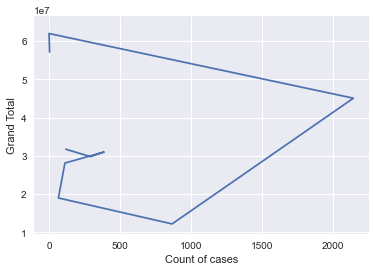

In [37]:
fig = sns.lineplot(x= data['Count of cases'],y= data['Grand Total'],sort=False)

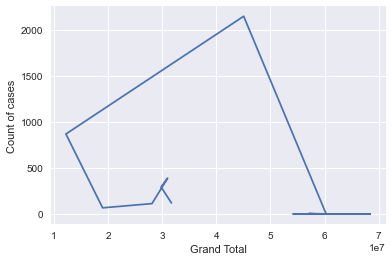

In [38]:

fig = sns.lineplot(y= data['Count of cases'],x= data['Grand Total'],sort=False)

In [39]:
train, test = train_test_split(data, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(20, 17)
(5, 17)


In [40]:
# Getting input data and targets for building prediction model
X_train = train.drop(['Count of cases', 'Metro'], axis=1)
y_train = train['Count of cases']
X_test= test.drop(['Count of cases', 'Metro'], axis=1)
y_test= test['Count of cases']
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print(X_train.head())
print(y_train.head())

X_train shape:  (20, 15)
y_train shape:  (20,)
X_test shape:  (5, 15)
y_test shape:  (5,)
    OFFENCE_MONTH   MP_POLICE_ISSUE_NUMBER  MP_CAMERA_ISSUE_NUMBER  \
9        1/12/2019                    1543                     0.0   
3        1/06/2020                    1381                 12643.0   
20       1/01/2018                    2136                     0.0   
23       1/10/2018                    2003                     0.0   
10       1/11/2019                    2122                     0.0   

    MP_TOTAL_NUMBER  SB_NUMBER  SB_VALUE   SC_NUMBER    RLC_NUMBER   \
9              1543       2017    711271        39213         13266   
3             14024       1052    369491        33917         10612   
20             2136       2106    725152        32637         12419   
23             2003       1373    471510        33498         14475   
10             2122       1515    527893        40460         14276   

    Total NUMBER   PIS_NUMBER        Bus    Ferry  Lightrail  

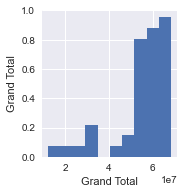

In [41]:
p = sns.pairplot(tspt[['date', 'Grand Total']])

### relationship between data sets 

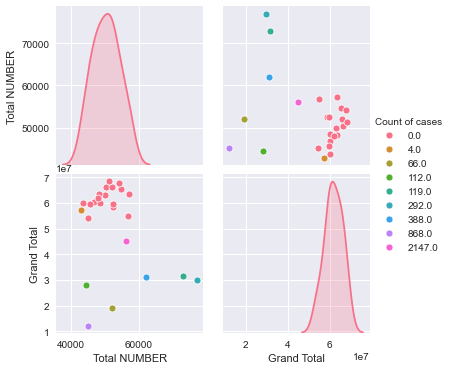

In [42]:
data=data.fillna(0)
#correlation using pairplot between the covid cases , total number of offences, and amount of transportation during that period.
sns.pairplot(data[['Total NUMBER','Count of cases','Grand Total']], hue="Count of cases")

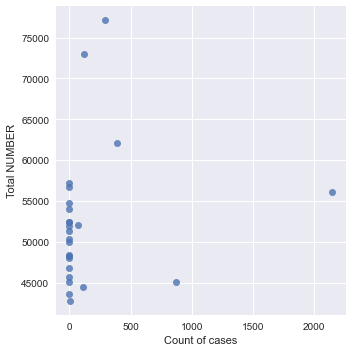

In [43]:
sns.lmplot('Count of cases', 'Total NUMBER',data, height=5, fit_reg=False)

In [44]:
data[['Count of cases', 'Total NUMBER']].corr()

,Count of cases,Total NUMBER
Count of cases,1.000000,0.154671
Total NUMBER,0.154671,1.000000


In [45]:
X=data[['Count of cases']]
Y=data['Total NUMBER']
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [46]:
print("y=", model.coef_,"*x +", model.intercept_)

y= [2.8280156] *x + 51949.9699863922


In [47]:
predicted = model.predict(X)
print("MSE:", mean_squared_error(Y, predicted))
print("R^2:", r2_score(Y, predicted))

MSE: 65146912.21767854
R^2: 0.0239231580153888


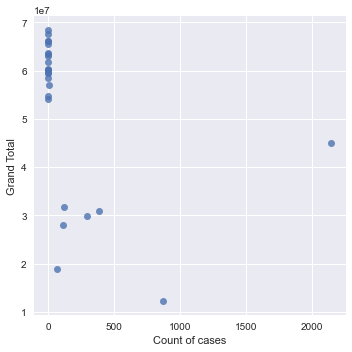

In [48]:
sns.lmplot("Count of cases", "Grand Total",data, height=5, fit_reg=False)

In [49]:
X=data[['Count of cases']]
Y=data['Grand Total']
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [50]:
predicted = model.predict(X)
print("MSE:", mean_squared_error(Y, predicted))
print("R^2:", r2_score(Y, predicted))

MSE: 222803921431871.9
R^2: 0.15901794528271762


### Extra model prediction

In [51]:
X = data.drop([' OFFENCE_MONTH ', 'Count of cases'],axis = 1)
y = data['Count of cases']
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

# check the shape of train and test
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (20, 15)
y_train shape: (20,)
X_test shape: (5, 15)
y_test shape: (5,)


### KNeigbours classifier

In [52]:
# create and train a KN classifier model
clf_knn = KNeighborsClassifier()

# train the model
clf_knn.fit(X_train,y_train)

# use the model to predict testing data
y_pred = clf_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy of test equals", accuracy)
print("confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Performance Metric Report: \n",classification_report(y_test,y_pred))


accuracy of test equals 0.6
confusion Matrix: 
 [[3 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]
Performance Metric Report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         4.0       0.00      0.00      0.00         1
        66.0       0.00      0.00      0.00         0
       119.0       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.19      0.25      0.21         5
weighted avg       0.45      0.60      0.51         5



##### KNeigbours classifier - analysis
this model has a very low accuracy model at 60% accuracy rate meaning its isnt going to predict the amount of covid cases correctly often. 

looking at the classification report 
* precision (accuracy of the predictions): best for no covid cases, at 75% while all other values had 0% precision
* recall (how many of this class you find over the whole number of element of this class): the test only had 0 covid cases
* F1-score (percent of correct predictions): 86% of the time covid was accuratly predicted at 0
* support (accutual occurrences of genres):0 cases was predicted 3 times, with 4 & 119 predicted 1 time each.

this model does a great job at predicting no covid cases, so pre 2020 its highly accurate, however it does little to solve our problem thus making it irrelevent to our project.
***
### Multinomial Naive Bayes

In [53]:
# create and train a Multinomial Naive Bayes model
clf_gnb = GaussianNB()

# train the model
clf_gnb.fit(X_train, y_train)

# use the model to predict testing data
y_pred = clf_gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy of test equals", accuracy)
print("confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Performance Metric Report: \n",classification_report(y_test,y_pred))

accuracy of test equals 0.6
confusion Matrix: 
 [[3 0 0]
 [1 0 0]
 [1 0 0]]
Performance Metric Report: 
               precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         4.0       0.00      0.00      0.00         1
       119.0       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.20      0.33      0.25         5
weighted avg       0.36      0.60      0.45         5



##### Multinomial Naive Bayes - analysis
this model has a very low accuracy model at 60% accuracy rate meaning its isnt going to predict the amount of covid cases correctly often

looking at the classification report 
* precision (accuracy of the predictions): best for no covid cases, at 60% while all other values had 0% precision
* recall (how many of this class you find over the whole number of element of this class): the test only had 0 covid cases
* F1-score (percent of correct predictions): 75% of the time covid was accuratly predicted at 0
* support (accutual occurrences of genres):0 cases was predicted 3 times, with 4 & 119 predicted 1 time each.

this model does a great job at predicting no covid cases, so pre 2020 its relatively accurate, however it does little to solve our problem thus making it irrelevent to our project.
***
### Gaussian Naive Bayes

In [54]:
# create and train a Gaussian Naive Bayes model
clf_mnb = MultinomialNB()

# train the model
clf_mnb.fit(X_train, y_train)

# use the model to predict testing data
y_pred = clf_mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy of test equals", accuracy)
print("confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Performance Metric Report: \n",classification_report(y_test,y_pred))

accuracy of test equals 0.4
confusion Matrix: 
 [[2 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Performance Metric Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         4.0       0.00      0.00      0.00         1
       119.0       0.00      0.00      0.00         1
       388.0       0.00      0.00      0.00         0
      2147.0       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.20      0.13      0.16         5
weighted avg       0.60      0.40      0.48         5



##### Multinomia Naive Bayes - analysis
this model has a very low accuracy model at 60% accuracy rate meaning its isnt going to predict the amount of covid cases correctly often

looking at the classification report 
* precision (accuracy of the predictions): best for no covid cases, at 100% while all other values had 0% precision
* recall (how many of this class you find over the whole number of element of this class): 0 covid cases was at 67%
* F1-score (percent of correct predictions): 80% of the time covid was accuratly predicted at 0
* support (accutual occurrences of genres):0 cases was predicted 3 times, with 4 & 119 predicted 1 time each.

this model does a great job at predicting no covid cases, so pre 2020 its relatively accurate, however it does little to solve our problem thus making it irrelevent to our project.
***
### logistic Regression

In [55]:
# create and train a logistic Regression model
clf_lr = LogisticRegression()
# train the model
clf_lr = clf_lr.fit(X_train, y_train)

# use the model to predict testing data
y_pred = clf_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy of test equals", accuracy)
print("confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Performance Metric Report: \n",classification_report(y_test,y_pred))

accuracy of test equals 0.6
confusion Matrix: 
 [[3 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 0]]
Performance Metric Report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         4.0       0.00      0.00      0.00         1
       119.0       0.00      0.00      0.00         1
      2147.0       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.19      0.25      0.21         5
weighted avg       0.45      0.60      0.51         5



##### logistic Regression - analysis
this model has a very low accuracy model at 60% accuracy rate meaning its isnt going to predict the amount of covid cases correctly often

looking at the classification report 
* precision (accuracy of the predictions): best for no covid cases, at 75% while all other values had 0% precision
* recall (how many of this class you find over the whole number of element of this class): 0 covid cases was at 100%
* F1-score (percent of correct predictions): 86% of the time covid was accuratly predicted at 0 cases
* support (accutual occurrences of genres):0 cases was predicted 3 times, with 4 & 119 predicted 1 time each.

this model does a great job at predicting no covid cases, so pre 2020 its relatively accurate, however it does little to solve our problem thus making it irrelevent to our project.
